In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
fx = lambda x: np.sin(x) * np.sqrt(x) + 1


In [27]:
nodes = [(j * np.pi/7) for j in [0, 0.5, 1.5, 2.5, 4.5, 6.5, 7]]

In [28]:
section = np.linspace(0, np.pi, 1000)  

In [29]:
def slope(i, fxset, h):
    if i == 0:
        return (4*fxset[1] - fxset[2] - 3*fxset[0]) / (2*h)

    elif i == len(fxset)-1:
        return (3*fxset[-1] - fxset[-1-2] - 3*fxset[-1-1]) / (2*h)
    
    else:
        return (fxset[i+1] + fxset[i-1]) / (2*h)

In [30]:
def common_spline(linspace, fx, start_section, end_section, N):
    h = [(end_section - start_section) / N for _ in range(N)]
    common_nodes = np.linspace(start_section, end_section, N+1)
    X = np.append(linspace, common_nodes)
    X.sort()
    X_aslist = X.tolist()
    plt.plot(section, fx(section))
    for i in range(N): 
        node = common_nodes[i]
        nnode = common_nodes[i+1]
        loc_start = X_aslist.index(node)
        loc_end = X_aslist.index(nnode)
        fxset = X_aslist[loc_start:loc_end]
        fxset = np.array(fxset)
        st1 = fx(node) * np.power(nnode-fxset, 2) * 2 * (fxset - node + 0.5*h[i]) / h[i]**3
        st2 = fx(nnode) * np.power(fxset-node, 2) * 2 * (nnode - fxset + 0.5*h[i]) / h[i]**3        
        st3 = slope(i, fx(common_nodes), h[i]) * np.power(nnode-fxset, 2) * (fxset - node) / h[i]**2
        st4 = slope(i+1, fx(common_nodes), h[i]) * np.power(fxset-node, 2) * (fxset - nnode) / h[i]**2
        Si = st1 + st2 + st3 + st4
        plt.plot(fxset, Si)
 

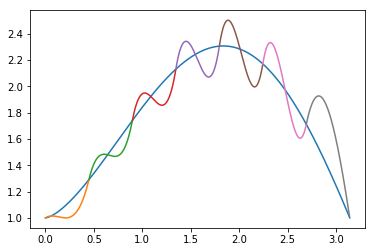

In [31]:
common_spline(section, fx, 0, np.pi, 7)

In [32]:
def special_spline(linspace, fx, start_section, end_section, nodes):
    h = [nodes[i+1]-nodes[i] for i in range(len(nodes)-1)]
    X = np.append(linspace, nodes)
    X.sort()
    X_aslist = X.tolist()
    plt.plot(section, fx(section))
    for i in range(len(nodes)-1): 
        node = nodes[i]
        nnode = nodes[i+1]
        loc_start = X_aslist.index(node)
        loc_end = X_aslist.index(nnode)
        fxset = X_aslist[loc_start:loc_end]
        fxset = np.array(fxset)
        st1 = fx(node) * np.power(nnode-fxset, 2) * 2 * (fxset - node + 0.5*h[i]) / h[i]**3
        st2 = fx(nnode) * np.power(fxset-node, 2) * 2 * (nnode - fxset + 0.5*h[i]) / h[i]**3        
        st3 = slope(i, fx(nodes), h[i]) * np.power(nnode-fxset, 2) * (fxset - node) / h[i]**2
        st4 = slope(i+1, fx(nodes), h[i]) * np.power(fxset-node, 2) * (fxset - nnode) / h[i]**2
        Si = st1 + st2 + st3 + st4
        plt.plot(fxset, Si)

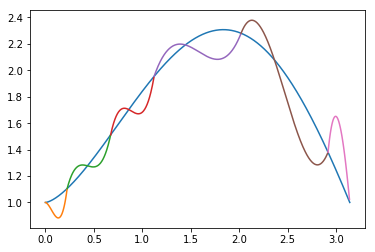

In [33]:
special_spline(section, fx, 0, np.pi, nodes)